1. Importing all necessary libraries and loading the data:

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
heart_disease_data = pd.read_csv("/Users/michaelwein/Downloads/framingham_heart_disease.csv")

2. Making an EDA to get all necessary information for making a model:

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

 Shape:  (4238, 16) 

 Head:  

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  dia

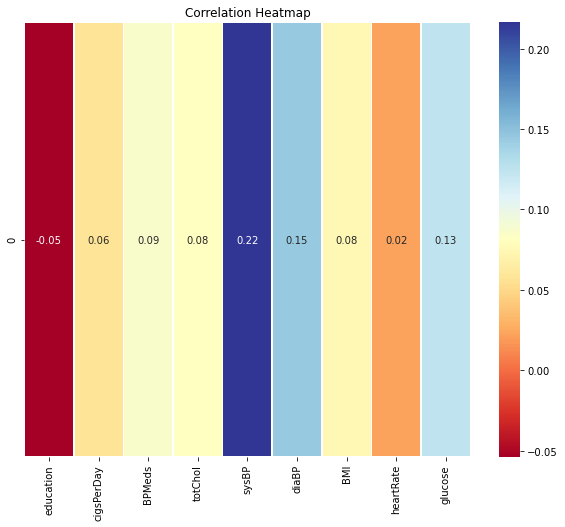

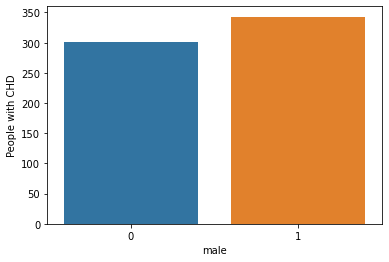

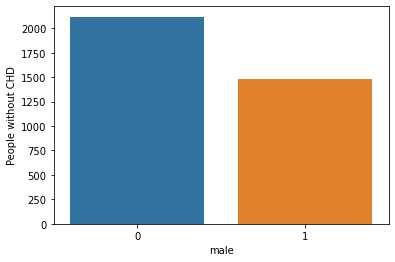

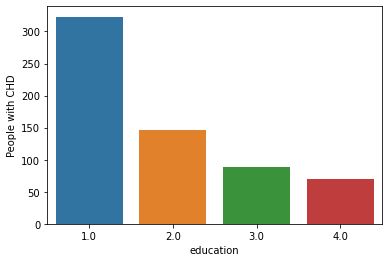

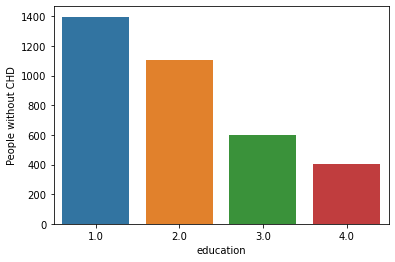

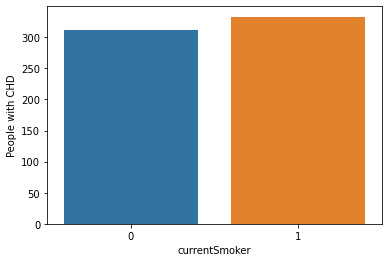

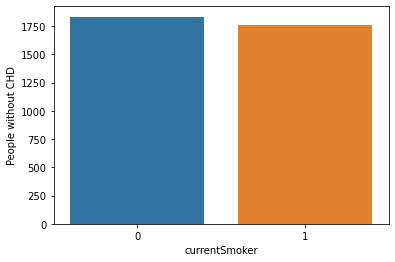

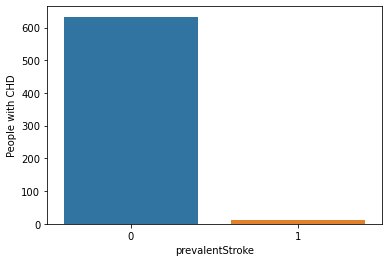

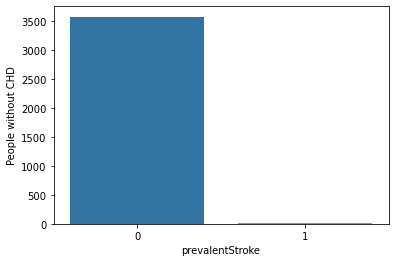

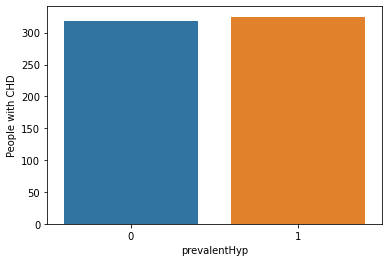

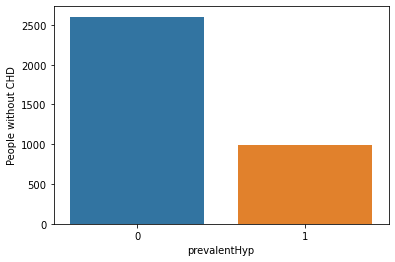

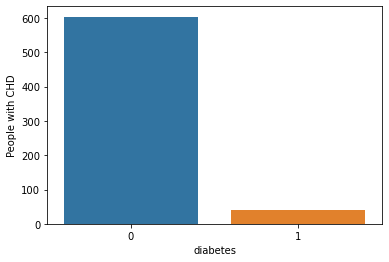

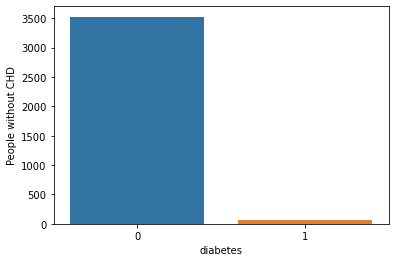

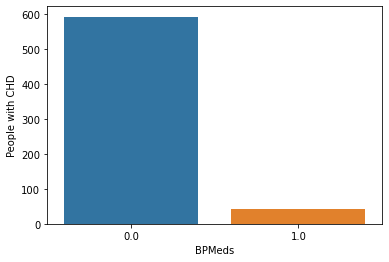

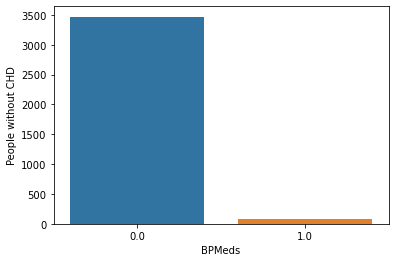

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,,
0,0.410684,48.767668,2.002282,0.489983,8.710401,0.023367,0.003895,0.275737,0.019199,235.172530,130.333612,82.160963,25.673007,75.762382,80.682125
1,0.532609,54.145963,1.848726,0.517081,10.629283,0.064771,0.017081,0.504658,0.062112,245.388976,143.618789,86.981366,26.531451,76.530327,89.008418


In [2]:
def EDA1(df):  
    print(df.dtypes)
    print("\n" +'\033[1m',"Shape:",'\033[0m', df.shape, "\n")
    print('\033[1m',"Head:",'\033[0m', "\n")
    print(df.head())
    print("\n", '\033[1m',"Information:",'\033[0m', "\n")
    df.info()
    print("\n" +'\033[1m', "Summary statistics:", '\033[0m' + "\n")
    print(df.describe())
def EDA2(df):
    print("\n" +'\033[1m', "Standard Correlation Coefficient:", '\033[0m' + "\n")
    float_columns = df.select_dtypes(include=['float'])
    corr = float_columns.corrwith(df['TenYearCHD'])
    print(corr)
    corr_matrix = corr.to_frame().transpose()
    # Generating the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu',fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()
def helper(df, feature, ylabel):
    cross_tab = pd.crosstab(df['TenYearCHD'], df[feature]) 
    sns.barplot(data=cross_tab, ci=None)
    plt.xlabel(feature)
    plt.ylabel(ylabel)
    plt.show()
def EDA3(df):
    df_1 = df[df["TenYearCHD"] == 1]
    df_2 = df[df["TenYearCHD"] == 0]
    for feature in ['male', 'education', 'currentSmoker', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'BPMeds']:
        helper(df_1, feature, "People with CHD")
        helper(df_2, feature, "People without CHD")
EDA1(heart_disease_data)
EDA2(heart_disease_data)
EDA3(heart_disease_data)
heart_disease_data.groupby('TenYearCHD').mean()

3. Adjusting the data so we can use it without problems:

In [3]:
mean_cigsPerDay = round(heart_disease_data["cigsPerDay"].mean())
mean_BPmeds = round(heart_disease_data["BPMeds"].mean())
mean_totChol = round(heart_disease_data["totChol"].mean())
mean_BMI = round(heart_disease_data["BMI"].mean())
mean_glucose = round(heart_disease_data["glucose"].mean())
mean_heartRate = round(heart_disease_data["heartRate"].mean())
heart_disease_data['cigsPerDay'].fillna(mean_cigsPerDay, inplace = True)
heart_disease_data['BPMeds'].fillna(mean_BPmeds, inplace = True)
heart_disease_data['totChol'].fillna(mean_totChol, inplace = True)
heart_disease_data['BMI'].fillna(mean_BMI, inplace = True)
heart_disease_data['glucose'].fillna(mean_glucose, inplace = True)
heart_disease_data['heartRate'].fillna(mean_heartRate, inplace = True)
heart_disease_data.dropna(inplace=True)#For the education columns


heart_disease_data['age'] = heart_disease_data['age'].astype(float)
heart_disease_data['BPMeds'] = heart_disease_data['BPMeds'].astype(int)
heart_disease_data['education'] = heart_disease_data['education'].astype('category')

4. Seperating the data:

In [4]:
y = heart_disease_data["TenYearCHD"]
features_dropped = ["TenYearCHD"]
X = heart_disease_data.drop(features_dropped,axis = 1)
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 0,test_size=.25)

5. Training the data and seeing its accuracy:

In [5]:
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001,0.01,0.1,1,10,100], 'solver': ['liblinear']}
logreg_cv= GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)
logreg_cv.fit(X_train,y_train)
y_predictions = logreg_cv.predict(X_val)
print ("Accuracy : ", accuracy_score(y_val, y_predictions)) 
print (classification_report(y_val, y_predictions)) 

Accuracy :  0.8539651837524178
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       876
           1       0.71      0.08      0.14       158

    accuracy                           0.85      1034
   macro avg       0.78      0.54      0.53      1034
weighted avg       0.83      0.85      0.80      1034

